In [2]:

import pandas as pd 
import numpy as np


df = pd.read_csv("House_Rent_Dataset.csv")

arrayColumn = df.columns

# df.info() # we dont have any null row

df.apply(lambda x: len(x.unique())) 

print(len(df))

4746


In [3]:
from ast import Lambda
from operator import index


len(df["Floor"].unique()) 

newFloor = df.groupby("Floor")["Rent"].mean()

df["Floor"] = df["Floor"].apply(lambda x: newFloor.loc[x])

# df["Floor"] = df["Floor"].apply(lambda x: newFloor[x] ) # tekrar edilecek
# df["Floor"]


# df["Floor"] = df["Floor"].apply(lambda x: newFloor.loc[x] )

# df["Floor"]


df["Area Type"].value_counts() #We can throw to Built area


df.drop(df[df["Area Type"]=="Built Area"].index, axis=0, inplace=True)

df = pd.get_dummies(df,columns=["Area Type"]) # Here we made columns more from area type


# aaa = df["Area Locality"].value_counts().reset_index()

# bbb = aaa[aaa["Area Locality"] == 1]["index"].unique() #Trying to change 1400 row which is value count is 1 but correlation with rent is lower than direct groupby

# df["Area Locality"] = df["Area Locality"].apply(lambda x : "other" if x in bbb else x ) 


# areaList = aaa["index"].values







AreaGroup = df.groupby("Area Locality")["Rent"].mean()

df["Area Locality"] = df["Area Locality"].apply(lambda x: AreaGroup.loc[x])

df["Area Locality"].corr(df["Rent"]) 



df = pd.get_dummies(df, columns=["City"])



df["Furnishing Status"].value_counts()


df["Furnishing Status"] = df["Furnishing Status"].apply(lambda x: 2 if x == "Furnished" else (1 if x == "Semi-Furnished" else 0))



df =pd.get_dummies(df,columns=["Tenant Preferred"])





df.drop(df[df["Point of Contact"] == "Contact Builder"].index,inplace=True)

df = pd.get_dummies(df, columns=["Point of Contact"])

df["Posted On"] = pd.to_datetime(df["Posted On"])


postedMean = df.groupby("Posted On")["Rent"].mean()

df["Posted On"] = df["Posted On"].apply(lambda x : postedMean[x] )


print(len(df))

4743


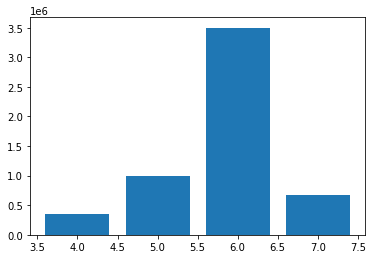

In [4]:

# Here, we see in june rented more house than other month

import matplotlib.pyplot as plt
import numpy as np

dfn = pd.read_csv("House_Rent_Dataset.csv")

dfn["Posted On"] = pd.to_datetime(dfn["Posted On"])

# make data:
np.random.seed(3)
x = dfn["Posted On"].dt.month
y = dfn["Rent"]

# plot
fig, ax = plt.subplots()

plt.bar(x, y)



plt.show()

In [5]:

# Here we can see how many flat rented by month

from distutils.log import info

total = pd.DataFrame(dfn["Posted On"].dt.month)

total.value_counts()
    

Posted On
6            1859
5            1681
7             978
4             228
dtype: int64

In [6]:
#Here we see in july mostly renting to most higer prices houses.

month4 = dfn[dfn["Posted On"].dt.month == 4 ]["Rent"].sum() / len(dfn[dfn["Posted On"].dt.month == 4 ])
month5 = dfn[dfn["Posted On"].dt.month == 5 ]["Rent"].sum() / len(dfn[dfn["Posted On"].dt.month == 5 ])
month6 = dfn[dfn["Posted On"].dt.month == 6 ]["Rent"].sum() / len(dfn[dfn["Posted On"].dt.month == 6 ])
month7 = dfn[dfn["Posted On"].dt.month == 7 ]["Rent"].sum() / len(dfn[dfn["Posted On"].dt.month == 7 ])

print(month4 , " ",month5 , " ",month6 , " ",month7 , " ")

19070.504385964912   27556.183819155263   37387.46100053792   46938.25153374233  


In [7]:


# Most expensive flats on Bandel

dfn[dfn["Area Locality"] == "Bandel"]["Rent"].sum() / len(dfn [dfn["Area Locality"] == "Bandel"]) 


maxi = 0


for x in dfn["Area Locality"]:
    
    
    res = dfn[dfn["Area Locality"] == x]["Rent"].sum() / len(dfn[dfn["Area Locality"] == x])

    if res> maxi:
    
        maxi = res
        print(x , " " , maxi)
        break



Bandel   8250.0


Text(0.5, 0, 'Data')

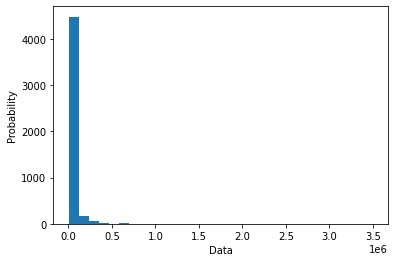

In [8]:


import matplotlib.pyplot as plt
import numpy as np

plt.hist(df["Rent"], density=False, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')



In [9]:
df

,Posted On,BHK,Rent,Size,Floor,Area Locality,Furnishing Status,Bathroom,Area Type_Carpet Area,Area Type_Super Area,...,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,49445.945946,2,10000,1100,14152.820000,8250.000000,0,2,0,1,...,0,0,0,1,0,0,1,0,0,1
1,32812.458333,2,20000,800,17954.607509,11750.000000,1,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,22061.111111,2,17000,1000,17954.607509,23187.500000,1,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,35848.181818,2,10000,800,14446.701847,16000.000000,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
4,15477.272727,2,7500,850,14446.701847,7500.000000,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,49445.945946,2,15000,1000,22162.869048,15750.000000,1,2,1,0,...,0,0,1,0,0,0,1,0,0,1
4742,15886.363636,3,29000,2000,25138.500000,29000.000000,1,3,0,1,...,0,0,1,0,0,0,1,0,0,1
4743,40642.767857,3,35000,1750,22162.869048,30555.555556,1,3,1,0,...,0,0,1,0,0,0,1,0,1,0
4744,47996.569132,3,45000,1500,45000.000000,43879.310345,1,2,1,0,...,0,0,1,0,0,0,0,1,1,0


In [10]:
#Anomaly detection
from sklearn.preprocessing import quantile_transform
target = df["Rent"].mean()
target


target = df["Rent"].mean()

df.sort_values(by = "Rent",ascending=True,inplace=True)



q1 = int(df["Rent"].quantile(0.25))
q2 = df["Rent"].quantile(0.50)
q3 = int(df["Rent"].quantile(0.75))

total = q3 - q1

iqr = total * 1.5


price_outliers = df[ df['Rent'] > q3 + iqr ]
print("OUTLIERS 1")

out = price_outliers.index


df.drop(labels=out,inplace=True)
    
print(len(df))

OUTLIERS 1
4223


In [11]:
#Here I am looking for transformation values. If there is some big change for Change to the variable

def func(values: pd.Series, functionName : str) -> pd.Series:
    
    if functionName == "log":
        return np.log(values)
    
    elif functionName == "sqrt":
        return np.sqrt(values)
    
    elif functionName == "pow2.0":
        
        return np.power(values,2.0)
        
    elif functionName == "pow3.0":
        return np.power(values,3.0)
    
    elif functionName == "pow1.5":
        return np.power(values,1.5)
    
    elif functionName == "pow1.2":
        return np.power(values,1.2)
    
    elif functionName == "pow0.7":
        return np.power(values,0.7)
    
    elif functionName == "exp":
        return np.exp(values)
    
    elif functionName == "round":
        return np.round(values)
    
    elif functionName == "round-1":
        return np.round(values,-1)
    
    elif functionName == "gtMean":
        mean =  np.mean(values)
        return mean < values
    
    elif functionName == "gtMedian":
        median = np.median(values).astype(int)
        return values > median

results = pd.DataFrame ( columns= ["self","corr","log","sqrt",
"pow2.0",
"pow3.0",
"pow1.5",
"pow1.2",
"pow0.7",
"exp",
"round",
"round-1",
"gtMean",
"getMedian"])



for x in df:
    if df.dtypes[x] in ["float64","int64","uint8"]:
        results.loc[len(results)]= [x,
        df[x].corr(df["Rent"]),
        func(df[x],"log").corr(df["Rent"]),
        func(df[x],'sqrt').corr(df["Rent"]),
        func(df[x],"pow2.0").corr(df["Rent"]),
        func(df[x],"pow3.0").corr(df["Rent"]),
        func(df[x],"pow1.5").corr(df["Rent"]),
        func(df[x],"pow1.2").corr(df["Rent"]),
        func(df[x],"pow0.7").corr(df["Rent"]),
        func(df[x],"exp").corr(df["Rent"]),
        func(df[x],"round").corr(df["Rent"]),
        func(df[x],"round-1").corr(df["Rent"]),
        func(df[x],"gtMean").corr(df["Rent"]),
        func(df[x],"gtMedian").corr(df["Rent"])
        ]
        
#
results["max"] = results.max(axis = 1)
results["min"] = results.min(axis=1)
max = results.max(axis = 1)
min = results.min(axis=1)

results["fark"] = abs(results.max(axis = 1))-abs(results["corr"])
results.to_csv("results.csv")


c:\Users\jcteb\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jcteb\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jcteb\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jcteb\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jcteb\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Us

In [12]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
# I do SHUFFLE to data frame
df = df.sample(frac = 1.0)

columns = list(df.columns)
columns.remove('Rent')


#: cuting test and train for teach 
number_of_rows = len(df) 
train_count = int(number_of_rows * 0.70) 

train = df[:train_count]
test = df[train_count:]

train_y = train['Rent']
train_x = train[ columns ]

test_y = test['Rent']
test_x = test[ columns ]


#: CREATE THE CLASSIFIERS

algorithms = [ RandomForestRegressor(), 
    AdaBoostRegressor(), 
    MLPRegressor(random_state=1, max_iter=300) ,
    DecisionTreeRegressor(random_state=0)
]




for a in algorithms:
    a.fit( train_x, train_y )
    
    pred = a.predict( test_x )
    # print(test_x)
    print( a, a.score( test_x, test_y ) )

RandomForestRegressor() 0.87059391530528
AdaBoostRegressor() 0.7368741983020541
MLPRegressor(max_iter=300, random_state=1) 0.7670923642603769
DecisionTreeRegressor(random_state=0) 0.746345705393906


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


kolon = df.columns
print(kolon)
X = df[ ['Posted On', 'BHK', 'Size', 'Floor', 'Area Locality',
       'Furnishing Status', 'Bathroom', 'Area Type_Carpet Area',
       'Area Type_Super Area', 'City_Bangalore', 'City_Chennai', 'City_Delhi',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Tenant Preferred_Bachelors', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Agent',
       'Point of Contact_Contact Owner'] ]
y = df[ 'Rent' ]

reg = LinearRegression().fit(X, y)
reg = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
reg = RandomForestRegressor(max_depth=3, random_state=0).fit(X, y)

print( reg.score(X, y) )





Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Locality',
       'Furnishing Status', 'Bathroom', 'Area Type_Carpet Area',
       'Area Type_Super Area', 'City_Bangalore', 'City_Chennai', 'City_Delhi',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Tenant Preferred_Bachelors', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Agent',
       'Point of Contact_Contact Owner'],
      dtype='object')
0.7856116025457196
